# Mini-Project: Data Wrangling and Transformation with Pandas

Working with tabular data is a necessity for anyone with enterprises having a majority of their data in relational databases and flat files. This mini-project is adopted from the excellent tutorial on pandas by Brandon Rhodes which you have watched earlier in the Data Wrangling Unit. In this mini-project, we will be looking at some interesting data based on movie data from the IMDB.

This assignment should help you reinforce the concepts you learnt in the curriculum for Data Wrangling and sharpen your skills in using Pandas. Good Luck!

### Please make sure you have one of the more recent versions of Pandas

In [228]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [229]:
pd.__version__

'1.0.1'

## Taking a look at the Movies dataset
This data shows the movies based on their title and the year of release

In [230]:
movies = pd.read_csv('titles.csv')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244914 entries, 0 to 244913
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   244914 non-null  object
 1   year    244914 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


In [231]:
movies.head()

,title,year
0,The Ticket to the Life,2009
1,Parallel Worlds: A New Rock Music Experience,2016
2,Morita - La hija de Jesus,2008
3,Gun,2017
4,Love or Nothing at All,2014


## Taking a look at the Cast dataset

This data shows the cast (actors, actresses, supporting roles) for each movie

- The attribute `n` basically tells the importance of the cast role, lower the number, more important the role.
- Supporting cast usually don't have any value for `n`

In [232]:
cast = pd.read_csv('cast.csv.zip')
cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3786176 entries, 0 to 3786175
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   title      object 
 1   year       int64  
 2   name       object 
 3   type       object 
 4   character  object 
 5   n          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 173.3+ MB


In [233]:
cast.head(10)

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0
9,Desire (III),2014,Syaiful 'Ariffin,actor,Actor Playing Eteocles from 'Antigone',NaN


## Taking a look at the Release dataset

This data shows details of when each movie was release in each country with the release date

In [234]:
release_dates = pd.read_csv('release_dates.csv', parse_dates=['date'], infer_datetime_format=True)
release_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479488 entries, 0 to 479487
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   title    479488 non-null  object        
 1   year     479488 non-null  int64         
 2   country  479488 non-null  object        
 3   date     479488 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 14.6+ MB


In [235]:
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


# Section I - Basic Querying, Filtering and Transformations

### What is the total number of movies?

In [236]:
len(movies)

244914

### List all Batman movies ever made

In [237]:
batman_df = movies[movies.title == 'Batman']
print('Total Batman Movies:', len(batman_df))
batman_df

Total Batman Movies: 2


,title,year
52734,Batman,1943
150621,Batman,1989


### List all Batman movies ever made - the right approach

In [238]:
batman_df = movies[movies.title.str.contains('Batman', case=False)]
print('Total Batman Movies:', len(batman_df))
batman_df.head(10)

Total Batman Movies: 35


,title,year
16813,Batman: Anarchy,2016
30236,Batman Forever,1995
31674,Batman Untold,2010
31711,Scooby-Doo & Batman: the Brave and the Bold,2018
41881,Batman the Rise of Red Hood,2018
43484,Batman: Return of the Caped Crusaders,2016
46333,Batman & Robin,1997
51811,Batman Revealed,2012
52734,Batman,1943
56029,Batman Beyond: Rising Knight,2014


### Display the top 15 Batman movies in the order they were released

In [239]:
batman_df.sort_values(by=['year'], ascending=True).iloc[:15]

,title,year
52734,Batman,1943
100056,Batman and Robin,1949
161439,Batman Dracula,1964
84327,Alyas Batman at Robin,1965
68364,James Batman,1966
161527,Batman: The Movie,1966
56159,Batman Fights Dracula,1967
168504,"Fight! Batman, Fight!",1973
150621,Batman,1989
156239,Alyas Batman en Robin,1991


### Section I - Q1 : List all the 'Harry Potter' movies from the most recent to the earliest

In [240]:
harry_potter_df = movies[movies.title.str.contains('Harry Potter', case=False)]
print('Total Harry Potter Movies', len(harry_potter_df))
harry_potter_df.sort_values('year', ascending = True)

Total Harry Potter Movies 8


,title,year
223087,Harry Potter and the Sorcerer's Stone,2001
82791,Harry Potter and the Chamber of Secrets,2002
61957,Harry Potter and the Prisoner of Azkaban,2004
187926,Harry Potter and the Goblet of Fire,2005
50581,Harry Potter and the Order of the Phoenix,2007
109213,Harry Potter and the Half-Blood Prince,2009
152831,Harry Potter and the Deathly Hallows: Part 1,2010
143147,Harry Potter and the Deathly Hallows: Part 2,2011


### How many movies were made in the year 2017?

In [241]:
# Would there be duplicate movies in the df???
len(movies[movies.year == 2017])

11474

### Section I - Q2 : How many movies were made in the year 2015?

In [242]:
len( movies[ movies.year == 2015 ])

8702

### Section I - Q3 : How many movies were made from 2000 till 2018?
- You can chain multiple conditions using OR (`|`) as well as AND (`&`) depending on the condition

In [243]:
len( movies[ (movies.year >= 2000) & (movies.year <= 2018) ])

114070

### Section I - Q4: How many movies are titled "Hamlet"?

In [244]:
# Match full string or using .str.contains ???
# len( movies[ movies.title.str.contains('Hamlet', case=False) ])
# movies[ movies.title.str.contains('Hamlet', case=False) ]
movies[ movies.title == 'Hamlet' ]
len(movies[ movies.title == 'Hamlet' ])

20

### Section I - Q5: List all movies titled "Hamlet" 
- The movies should only have been released on or after the year 2000
- Display the movies based on the year they were released (earliest to most recent)

In [245]:
movies[ (movies.title == 'Hamlet') & (movies.year >= 2000) ].sort_values(by = 'year', ascending = True)

,title,year
55639,Hamlet,2000
1931,Hamlet,2009
227953,Hamlet,2011
178290,Hamlet,2014
186137,Hamlet,2015
191940,Hamlet,2016
244747,Hamlet,2017


### Section I - Q6: How many roles in the movie "Inception" are of the supporting cast (extra credits)
- supporting cast are NOT ranked by an "n" value (NaN)
- check for how to filter based on nulls

In [246]:
inception_cast_df = cast[cast['title'] == 'Inception']
len(inception_cast_df[inception_cast_df['n'].isna()])

27

### Section I - Q7: How many roles in the movie "Inception" are of the main cast
- main cast always have an 'n' value

In [247]:
inception_cast_df[~inception_cast_df['n'].isna()].sort_values('n')
len(inception_cast_df[~inception_cast_df['n'].isna()])

51

### Section I - Q8: Show the top ten cast (actors\actresses) in the movie "Inception" 
- main cast always have an 'n' value
- remember to sort!

In [248]:
inception_cast_df[~inception_cast_df['n'].isna()].sort_values('n').head(10)

,title,year,name,type,character,n
590576,Inception,2010,Leonardo DiCaprio,actor,Cobb,1.0
859993,Inception,2010,Joseph Gordon-Levitt,actor,Arthur,2.0
3387147,Inception,2010,Ellen Page,actress,Ariadne,3.0
940923,Inception,2010,Tom Hardy,actor,Eames,4.0
2406531,Inception,2010,Ken Watanabe,actor,Saito,5.0
1876301,Inception,2010,Dileep Rao,actor,Yusuf,6.0
1615709,Inception,2010,Cillian Murphy,actor,Robert Fischer,7.0
183937,Inception,2010,Tom Berenger,actor,Browning,8.0
2765969,Inception,2010,Marion Cotillard,actress,Mal,9.0
1826027,Inception,2010,Pete Postlethwaite,actor,Maurice Fischer,10.0


### Section I - Q9:

(A) List all movies where there was a character 'Albus Dumbledore' 

(B) Now modify the above to show only the actors who played the character 'Albus Dumbledore'
- For Part (B) remember the same actor might play the same role in multiple movies

In [249]:
cast[cast['character'] == 'Albus Dumbledore']

,title,year,name,type,character,n
704984,Epic Movie,2007,Dane Farwell,actor,Albus Dumbledore,17.0
792421,Harry Potter and the Goblet of Fire,2005,Michael Gambon,actor,Albus Dumbledore,37.0
792423,Harry Potter and the Order of the Phoenix,2007,Michael Gambon,actor,Albus Dumbledore,36.0
792424,Harry Potter and the Prisoner of Azkaban,2004,Michael Gambon,actor,Albus Dumbledore,27.0
947789,Harry Potter and the Chamber of Secrets,2002,Richard Harris,actor,Albus Dumbledore,32.0
947790,Harry Potter and the Sorcerer's Stone,2001,Richard Harris,actor,Albus Dumbledore,1.0
1685537,Ultimate Hero Project,2013,George (X) O'Connor,actor,Albus Dumbledore,NaN
2248085,Potter,2015,Timothy Tedmanson,actor,Albus Dumbledore,NaN


In [250]:
print(cast[cast['character'] == 'Albus Dumbledore']['name'].unique())

['Dane Farwell' 'Michael Gambon' 'Richard Harris' "George (X) O'Connor"
 'Timothy Tedmanson']


### Section I - Q10:

(A) How many roles has 'Keanu Reeves' played throughout his career?

(B) List the leading roles that 'Keanu Reeves' played on or after 1999 in order by year.

In [251]:
# len(cast[cast['name'] == 'Keanu Reeves']['character'].unique())
# Or use .str.contains 
len(cast[cast['name'].str.contains('Keanu Reeves')]['character'].unique())

56

* What does leading roles mean in term of 'n'??? 1 or not NaN
* Why in John wick III Keanu is NaN??? 
* Why Keanu is not 1 in Matrix III???

In [252]:
# cast[(cast['name'] == 'Keanu Reeves') & (cast['n'] == 1) ]
# cast[(cast['name'] == 'Keanu Reeves') & (cast['character'] == 'Neo') ]
# cast[(cast['title'] == 'Keanu Reeves') & (cast['character'] == 'Neo') ]
# cast[cast.title.str.contains('The Matrix Reloaded')]
# len(cast[(cast['name'] == 'Keanu Reeves') & (cast['year'] >= 1999) & (~cast['n'].isna())])
#cast[(cast['name'] == 'Keanu Reeves') & (cast['year'] >= 1999) & (~cast['n'].isna())]
cast[(cast['name'] == 'Keanu Reeves') & (cast['year'] >= 1999) & (cast['n']==1)]


,title,year,name,type,character,n
1892342,47 Ronin,2013,Keanu Reeves,actor,Kai,1.0
1892348,Constantine,2005,Keanu Reeves,actor,John Constantine,1.0
1892358,Hard Ball,2001,Keanu Reeves,actor,Conor O'Neill,1.0
1892359,Henry's Crime,2010,Keanu Reeves,actor,Henry Torne,1.0
1892361,John Wick,2014,Keanu Reeves,actor,John Wick,1.0
1892362,John Wick: Chapter 2,2017,Keanu Reeves,actor,John Wick,1.0
1892366,Knock Knock,2015,Keanu Reeves,actor,Evan,1.0
1892378,Siberia,2018,Keanu Reeves,actor,Lucas Hill,1.0
1892382,Street Kings,2008,Keanu Reeves,actor,Detective Tom Ludlow,1.0
1892383,Sweet November,2001,Keanu Reeves,actor,Nelson Moss,1.0


### Section I - Q11: 

(A) List the total number of actor and actress roles available from 1950 - 1960

(B) List the total number of actor and actress roles available from 2007 - 2017

In [253]:
len(cast[(cast['year'] >= 1950) & (cast['year'] <= 1960)]['character'].unique())

139020

In [254]:
len(cast[(cast['year'] >= 2007) & (cast['year'] <= 2017)]['character'].unique())

619945

### Section I - Q12: 

(A) List the total number of leading roles available from 2000 to present

(B) List the total number of non-leading roles available from 2000 - present (exclude support cast)

(C) List the total number of support\extra-credit roles available from 2000 - present

In [255]:
# There are less here 
# len(cast[(cast['year'] >= 2000) &  (cast['n']==1)]['character'].unique())
# There are more here 
len(cast[(cast['year'] >= 2000) &  (cast['n']==1)])

60568

In [256]:
len( cast[(cast['year'] >= 2000) &  ~(cast['n']==1) & ~(cast['n'].isna())] )

1001710

In [257]:
len( cast[(cast['year'] >= 2000) &  ~(cast['n']==1) & (cast['n'].isna())] )

887484

# Section II - Aggregations, Transformations and Visualizations

## What are the top ten most common movie names of all time?


In [258]:
top_ten = movies.title.value_counts()[:10]
top_ten

Hamlet                  20
Carmen                  17
Macbeth                 16
Temptation              12
The Outsider            12
Maya                    12
Honeymoon               11
The Three Musketeers    11
Freedom                 11
Othello                 11
Name: title, dtype: int64

### Plot the top ten common movie names of all time

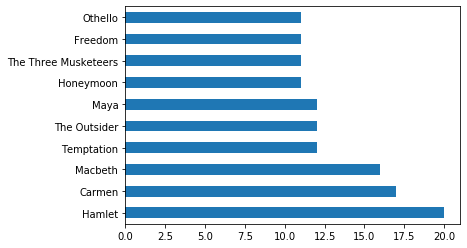

In [259]:
top_ten.plot(kind='barh')

### Section II - Q1:  Which years in the 2000s saw the most movies released? (Show top 3)

In [260]:
movies[movies['year'] // 10 == 200].year.value_counts()[:3]

2009    6125
2008    5151
2007    4467
Name: year, dtype: int64

### Section II - Q2: # Plot the total number of films released per-decade (1890, 1900, 1910,....)
- Hint: Dividing the year and multiplying with a number might give you the decade the year falls into!
- You might need to sort before plotting

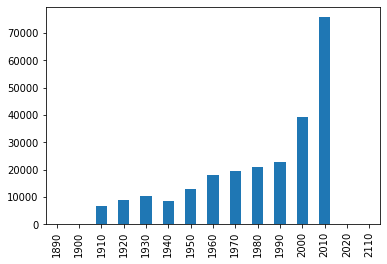

In [261]:
movies['decade'] = movies['year'] // 10 * 10
# for x in release_dates.groupby('decade'):
#     print( x )
# release_dates.groupby('decade').agg({'title':'count'}).plot(kind='bar')
# release_dates.groupby('decade').agg({'title':'count'})
movies['decade'].value_counts().sort_index().plot(kind='bar')

### Section II - Q3: 

(A) What are the top 10 most common character names in movie history?

(B) Who are the top 10 people most often credited as "Herself" in movie history?

(C) Who are the top 10 people most often credited as "Himself" in movie history?

In [262]:
cast['character'].value_counts()[:10]

Himself        20746
Dancer         12477
Extra          11948
Reporter        8434
Student         7773
Doctor          7669
Party Guest     7245
Policeman       7029
Nurse           6999
Bartender       6802
Name: character, dtype: int64

In [263]:
# cast[cast['character'] == 'Herself']['name'].value_counts()[:10]
cast[cast.character.str.contains('Herself', case=False)]['name'].value_counts()[:10]

Queen Elizabeth II                  18
Jacqueline Kennedy                  12
Margaret Thatcher                   10
Joyce Brothers                      10
Mar?a Luisa (V) Mart?n               9
Hillary Clinton                      9
Luisa Horga                          9
Pat Nixon                            8
Caroline Kennedy                     7
Queen Elizabeth the Queen Mother     7
Name: name, dtype: int64

In [264]:
# cast[cast['character'] == 'Himself']['name'].value_counts()[:10]
cast[cast.character.str.contains('Himself', case=False)]['name'].value_counts()[:10]

Adolf Hitler             115
Richard Nixon             54
John F. Kennedy           49
Ronald Reagan             46
Winston Churchill         28
George W. Bush            28
Martin Luther King        26
Benito Mussolini          26
Franklin D. Roosevelt     25
Bill Clinton              23
Name: name, dtype: int64

In [265]:
cast[cast['name'] == 'Adolf Hitler']

,title,year,name,type,character,n
1005051,36 Hours,1964,Adolf Hitler,actor,Himself - in Newsreel,NaN
1005052,A Bridge Too Far,1977,Adolf Hitler,actor,Himself - Salutes Parade,NaN
1005053,A Clockwork Orange,1971,Adolf Hitler,actor,Himself,NaN
1005054,And Now for Something Completely Different,1971,Adolf Hitler,actor,"Himself - Speech to RAD, from T.d.W.",NaN
1005055,Anthropoid,2016,Adolf Hitler,actor,Himself,NaN
...,...,...,...,...,...,...
1005166,What We Do in the Shadows,2014,Adolf Hitler,actor,Himself,NaN
1005167,Wienfilm 1896-1976,1976,Adolf Hitler,actor,Himself,NaN
1005168,Wizards,1977,Adolf Hitler,actor,Himself,NaN
1005169,Yo amo a Hitler,1984,Adolf Hitler,actor,Himself,NaN


### Section II - Q4: 

(A) What are the top 10 most frequent roles that start with the word "Zombie"?

(B) What are the top 10 most frequent roles that start with the word "Police"?

- Hint: The `startswith()` function might be useful

In [266]:
# There lenght are the same. There results are the same 
# cast[cast['character'].str.contains('^Zombie')]['character'].value_counts()[:10]
cast[cast['character'].str.startswith('Zombie')]['character'].value_counts()[:10]

Zombie                         6264
Zombie Horde                    206
Zombie - Protestor - Victim      78
Zombie Extra                     70
Zombie Dancer                    43
Zombie Girl                      36
Zombie #1                        36
Zombie #2                        31
Zombie Vampire                   25
Zombie Victim                    22
Name: character, dtype: int64

In [267]:
# how to avoid policeman and policewoman
#cast[cast['character'].str.contains('^Police$|^Police\W')]['character'].value_counts()[:10]
cast[cast['character'].str.startswith('Police')]['character'].value_counts()[:10]

Policeman              7029
Police Officer         4808
Police Inspector        742
Police Sergeant         674
Police officer          539
Police                  456
Policewoman             415
Police Chief            410
Police Captain          387
Police Commissioner     337
Name: character, dtype: int64

### Section II - Q5: Plot how many roles 'Keanu Reeves' has played in each year of his career.

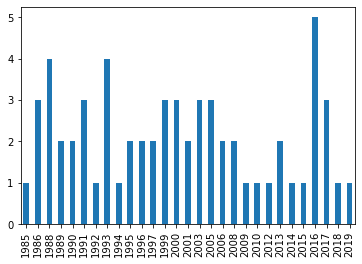

In [268]:
keanu_df = cast[cast['name'] == 'Keanu Reeves']
# keanu_df.groupby('year').agg({'title':'count'}).plot(kind='bar')
keanu_df['year'].value_counts().sort_index().plot(kind='bar')

### Section II - Q6: Plot the cast positions (n-values) of Keanu Reeve's roles through his career over the years.


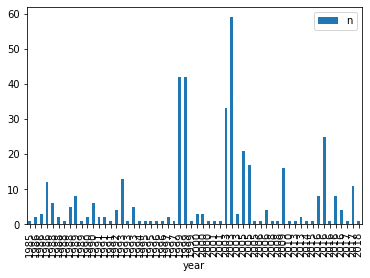

In [269]:
keanu_df[~keanu_df['n'].isna()][['year', 'n']].sort_values('year').plot(x='year', y='n', kind='bar')

# plt.bar(keanu_df['year'], keanu_df['n'])

### Section II - Q7: Plot the number of "Hamlet" films made by each decade

/home/joseph/anaconda3/envs/mec-miniprojects/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


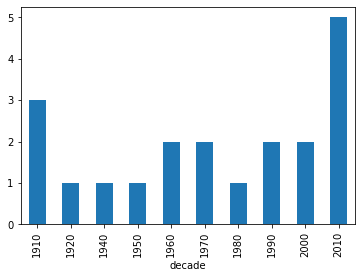

In [270]:
#should  use movies in an earlier question too 
hamlet_df = movies[movies['title']=='Hamlet']
hamlet_df['decade'] = hamlet_df['year']//10*10
# should remove duplicates. because a movie can have multiple actors 
# hamlet_df.groupby('decade').agg({'title':'count'})
hamlet_df.groupby('decade').count().rename({'title':'count'}, axis=1)['count'].plot(kind='bar')

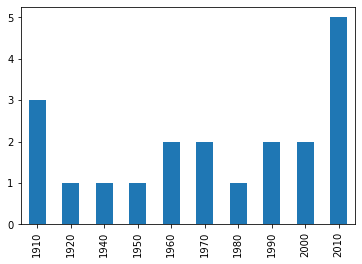

In [271]:
hamlet_df['decade'].value_counts().sort_index().plot(kind='bar')

### Section II - Q8: 

(A) How many leading roles were available to both actors and actresses, in the 1960s (1960-1969)?

(B) How many leading roles were available to both actors and actresses, in the 2000s (2000-2009)?

- Hint: A specific value of n might indicate a leading role

In [338]:
cast[ (cast['year']//10==196) & (cast['n']==1) ]
lead_df = (cast[ (cast['year']//10==196) & (cast['n']==1) ]
               .groupby(['year','type'])
               .count()
               .rename({'name':'count'}, axis=1)
               [['count']])
lead_df
# print(len(cast[(cast['year']//10==196) & (cast['n']==1) ]))

count
year type          
1960 actor      733
     actress    302
1961 actor      761
     actress    327
1962 actor      782
     actress    299
1963 actor      714
     actress    336
1964 actor      823
     actress    313
1965 actor      862
     actress    340
1966 actor      900
     actress    358
1967 actor      874
     actress    402
1968 actor      920
     actress    407
1969 actor      951
     actress    419

In [337]:
cast[(cast['year']//10==200) & (cast['n']==1) ]
lead_df = (cast[(cast['year']//10==200) & (cast['n']==1) ]
                .groupby(['year', 'type'])
                .count()
                .rename({'name':'count'}, axis=1)
                [['count']]
          )
lead_df
# print(len(cast[(cast['year']//10==200) & (cast['n']==1) ]))

count
year type          
2000 actor     1440
     actress    593
2001 actor     1462
     actress    633
2002 actor     1551
     actress    662
2003 actor     1540
     actress    662
2004 actor     1706
     actress    685
2005 actor     1836
     actress    787
2006 actor     2001
     actress    881
2007 actor     2145
     actress    819
2008 actor     2285
     actress    971
2009 actor     2591
     actress   1094

### Section II - Q9: List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [318]:
frank_df = (cast[cast['name'] == 'Frank Oz']
                .groupby(['year', 'title'])
                .agg({'character':'count'})
                .rename({'character':'freq'}, axis=1)
                .sort_values('year')
           )
frank_df[frank_df['freq']>1]
# frank_roles_df = frank_df
# frank_roles_df
# print(frank_roles_df[frank_roles_df['title']>1].sort_values('year').index)
# frank_roles_df[frank_roles_df['title']>1].sort_values('year')

freq
year title                                     
1979 The Muppet Movie                         8
1981 An American Werewolf in London           2
     The Great Muppet Caper                   6
1982 The Dark Crystal                         2
1984 The Muppets Take Manhattan               7
1985 Follow That Bird                         3
1992 The Muppet Christmas Carol               7
1996 Muppet Treasure Island                   4
1999 Muppets from Space                       4
     The Adventures of Elmo in Grouchland     3

### Section II - Q10: List each of the characters that Frank Oz has portrayed at least twice

In [307]:
frank_char_df = (frank_df.groupby('character')
                    .count()
                    .rename({'name':'freq'}, axis=1)
                    .sort_values('freq', ascending=False)
                    [['freq']]
                )
frank_char_df[frank_char_df['freq'] > 1]

,freq
character,
Animal,6
Miss Piggy,6
Yoda,6
Cookie Monster,5
Sam the Eagle,5
Fozzie Bear,4
Bert,3
Grover,2


# Section III - Advanced Merging, Querying and Visualizations

## Make a bar plot with the following conditions
- Frequency of the number of movies with "Christmas" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

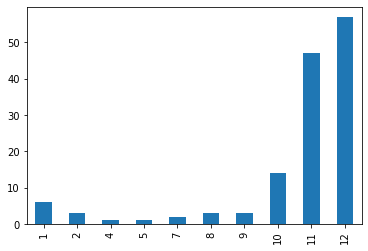

In [276]:
christmas = release_dates[(release_dates.title.str.contains('Christmas')) & (release_dates.country == 'USA')]
christmas.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q1: Make a bar plot with the following conditions
- Frequency of the number of movies with "Summer" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

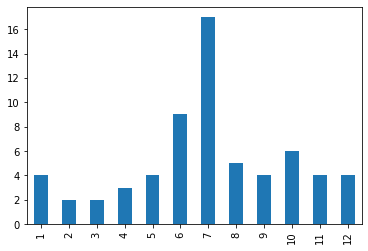

In [277]:
summer_df = release_dates[release_dates.title.str.contains('Summer') & (release_dates.country=='USA')]
summer_df['date'].dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q2: Make a bar plot with the following conditions
- Frequency of the number of movies with "Action" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by week

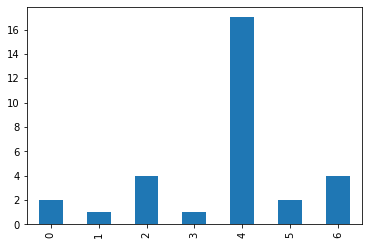

In [339]:
# week or weekday 
action_df = release_dates[release_dates.title.str.contains('Action') & (release_dates.country=='USA')]
action_df['date'].dt.dayofweek.value_counts().sort_index().plot(kind='bar')

### Section III - Q3: Show all the movies in which Keanu Reeves has played the lead role along with their   release date in the USA sorted by the date of release
- Hint: You might need to join or merge two datasets!

In [279]:
keanu_df = cast[(cast['name'] == 'Keanu Reeves') & (cast['n']==1)]
usa_df = release_dates[release_dates['country']=='USA']
usa_keanu_df = usa_df.merge(keanu_df, on = ['title', 'year'], suffixes = ['_release', '_cast'])
usa_keanu_df.sort_values('date')
# release_keanu_df[release_keanu_df['country']=='USA'][['title', 'date']].sort_values('date')
# release_dates[release_dates['title']=='Speed']
# cast[cast['title']=='Speed']

,title,year,country,date,name,type,character,n
20,The Night Before,1988,USA,1988-04-15,Keanu Reeves,actor,Winston Connelly,1.0
3,Bill & Ted's Excellent Adventure,1989,USA,1989-02-17,Keanu Reeves,actor,Ted,1.0
2,Bill & Ted's Bogus Journey,1991,USA,1991-07-19,Keanu Reeves,actor,Ted,1.0
12,Little Buddha,1993,USA,1994-05-25,Keanu Reeves,actor,Siddhartha,1.0
13,Speed,1994,USA,1994-06-10,Keanu Reeves,actor,Jack Traven,1.0
10,Johnny Mnemonic,1995,USA,1995-05-26,Keanu Reeves,actor,Johnny Mnemonic,1.0
1,A Walk in the Clouds,1995,USA,1995-08-11,Keanu Reeves,actor,Paul Sutton,1.0
4,Chain Reaction,1996,USA,1996-08-02,Keanu Reeves,actor,Eddie Kasalivich,1.0
6,Feeling Minnesota,1996,USA,1996-09-13,Keanu Reeves,actor,Jjaks Clayton,1.0
17,The Devil's Advocate,1997,USA,1997-10-17,Keanu Reeves,actor,Kevin Lomax,1.0


### Section III - Q4: Make a bar plot showing the months in which movies with Keanu Reeves tend to be released in the USA?

/home/joseph/anaconda3/envs/mec-miniprojects/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


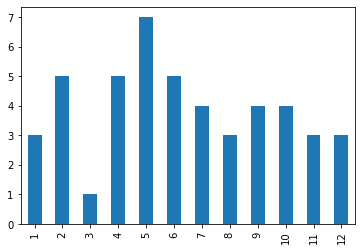

In [292]:
keanu_df = cast[cast['name'] == 'Keanu Reeves']
keanu_df.drop_duplicates('title', inplace = True)
keanu_df[keanu_df.duplicated('title', keep = False)]
usa_df = release_dates[release_dates['country']=='USA']
usa_keanu_df = usa_df.merge(keanu_df, on = ['title', 'year'], suffixes = ['_release', '_cast'])
usa_keanu_df[usa_keanu_df.duplicated('title')] # check duplicated 
usa_keanu_df['date'].dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q5: Make a bar plot showing the years in which movies with Ian McKellen tend to be released in the USA?

/home/joseph/anaconda3/envs/mec-miniprojects/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


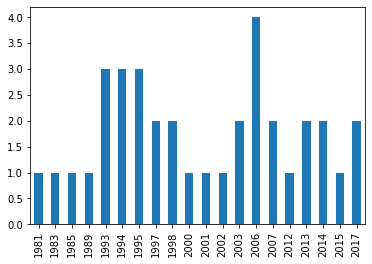

In [296]:
mckellen_df = cast[cast['name'] == 'Ian McKellen']
mckellen_df.drop_duplicates('title', inplace = True)
mckellen_df[mckellen_df.duplicated('title', keep = False)]
usa_df
usa_mckellen_df = usa_df.merge(mckellen_df, on = ['title', 'year'], suffixes = ['_release','_cast'])
usa_mckellen_df[usa_mckellen_df.duplicated()].sort_values('title')
usa_mckellen_df['year'].value_counts().sort_index().plot(kind = 'bar')